<a href="https://colab.research.google.com/github/Oldman3840/AI_Model_Evaluation/blob/main/1_02_CNN_exercise_Fahsion_MNIST_2_0ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First Convolutional Neural Network : Fashion MNIST
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on Fashion MNIST

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [39]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### Data Loading

In [40]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [41]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [42]:
labels = ["T-shirt/top",  # index 0
            "Trouser",      # index 1
            "Pullover",     # index 2 
            "Dress",        # index 3 
            "Coat",         # index 4
            "Sandal",       # index 5
            "Shirt",        # index 6 
            "Sneaker",      # index 7 
            "Bag",          # index 8 
            "Ankle boot"]   # index 9

print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


id = 5221
다음 그림은 T-shirt/top 입니다.


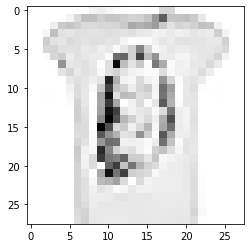

In [43]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')

plt.imshow(test_x[id], cmap='Greys')
plt.show()

### X : Min-Max Scaling

- 최소값 0, 최대값 1로 통일하는 스케일링

In [44]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

### X : Reshape(# of data, 28, 28, 1)

- **끝에 1을 달아서 그레이스케일(흑백)을 명시해준다.**

In [45]:
print(train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1).shape)
print(test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1).shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Y : One-Hot Encoding

In [46]:
from tensorflow.keras.utils import to_categorical

train_y_c = to_categorical(train_y)
test_y_c = to_categorical(test_y)

In [47]:
train_y_c.shape

(60000, 10)

### 코드를 완성해주세요!

- **자유롭게 먼저 해보는 것을 추천**
---
- **구조를 따라서 코딩을 한다면..**

    1. 인풋 레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. BatchNormalization
    4. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    5. BatchNormalization
    6. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    7. DropOut : 25% 비활성화
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    11. BatchNormalization
    12. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    13. DropOut : 25% 비활성화
    14. Flatten
    15. Fully Connected Layer : 노드 512개
    16. BatchNormalization
    17. 아웃풋 레이어

In [48]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout

In [49]:
# 1. 세션 클리어
clear_session()

# 2. 모델 사슬처럼 엮기
il = Input(shape=(28, 28, 1))

cl = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(il)
bl = BatchNormalization()(cl)
cl = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(bl)
bl = BatchNormalization()(cl)
ml = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(bl)
dl = Dropout(0.25)(ml)

cl = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(dl)
bl = BatchNormalization()(cl)
cl = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(bl)
bl = BatchNormalization()(cl)
ml = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(bl)
dl = Dropout(0.25)(ml)

fl = Flatten()(dl)
hl = Dense(512, activation='relu')(fl)
bl = BatchNormalization()(hl)
ol = Dense(10, activation='softmax')(bl)

# 3. 모델 시작과 끝 선언
model = keras.models.Model(il, ol)

# 4. 컴파일
model.compile(loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0     

### Early Stopping을 활용한 학습

- 조건
    1. validation_split = 0.2
    2. 1 epochs만 관찰해가며 속도가 가장 빠른 batch_size 찾아보기. 128개부터 시작하여 조절해볼 것.
    3. EarlyStopping. val_loss가 5 epoch 전과 비교하여 개선되지 않으면 스탑
    4. 이미지 시각화를 위해 hist 변수에 학습 과정을 넣어주세요.

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=0,
                   restore_best_weights=True)

In [51]:
hist = model.fit(train_x, train_y_c,
          validation_split=0.2,
          epochs=10000,
          verbose=1,
          batch_size=128,
          callbacks=[es])

Epoch 1/10000
375/375 [==============================] - 6s 8ms/step - loss: 0.4129 - accuracy: 0.8529 - val_loss: 0.9695 - val_accuracy: 0.6802
Epoch 2/10000
375/375 [==============================] - 3s 7ms/step - loss: 0.2759 - accuracy: 0.8997 - val_loss: 0.2440 - val_accuracy: 0.9093
Epoch 3/10000
375/375 [==============================] - 2s 7ms/step - loss: 0.2370 - accuracy: 0.9130 - val_loss: 0.2267 - val_accuracy: 0.9184
Epoch 4/10000
375/375 [==============================] - 3s 7ms/step - loss: 0.2167 - accuracy: 0.9206 - val_loss: 0.2179 - val_accuracy: 0.9201
Epoch 5/10000
375/375 [==============================] - 3s 7ms/step - loss: 0.1906 - accuracy: 0.9293 - val_loss: 0.2078 - val_accuracy: 0.9244
Epoch 6/10000
375/375 [==============================] - 3s 7ms/step - loss: 0.1750 - accuracy: 0.9345 - val_loss: 0.2342 - val_accuracy: 0.9177
Epoch 7/10000
375/375 [==============================] - 3s 7ms/step - loss: 0.1589 - accuracy: 0.9408 - val_loss: 0.2031 - val_ac

### 이미지 시각화

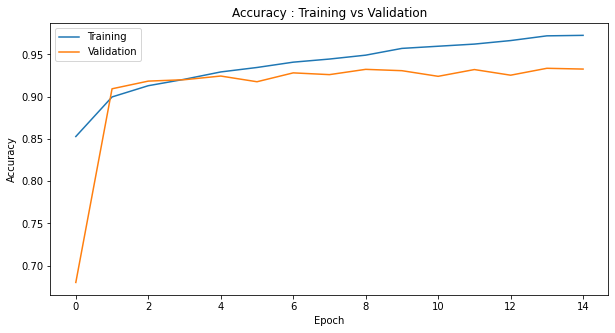

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

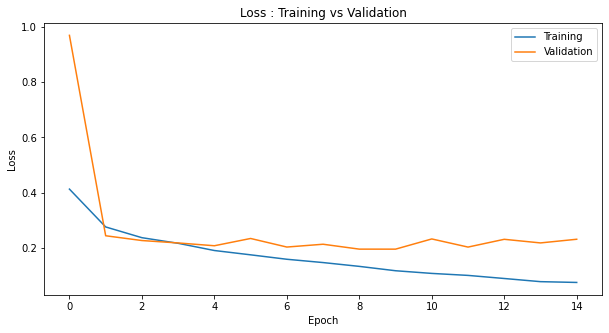

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [54]:
y_pred = model.predict(test_x)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [55]:
single_y_pred = y_pred.argmax(axis=1)
single_y_pred.shape

(10000,)

In [58]:
print(test_y.shape)
single_test_y = test_y_c.argmax(axis=1)
print(single_test_y.shape)

(10000,)
(10000,)


In [59]:
test_acc = accuracy_score(single_test_y, single_y_pred)

print(f'테스트셋 정확도 : {test_acc*100:.2f}%' )

테스트셋 정확도 : 93.00%


id = 715
다음 그림은 숫자 2 입니다.
모델의 예측 : 2
모델의 카테고리별 확률 : [ 0.  0. 70.  0. 27.  0.  1.  0.  0.  0.]
정답입니다


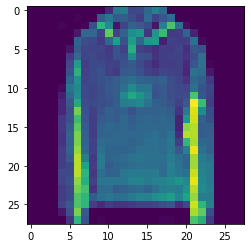

In [60]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

id = 9277
다음 그림은 숫자 6 입니다.
모델의 예측 : 0
모델의 카테고리별 확률 : [45.  0. 16.  0.  6.  0. 30.  0.  0.  0.]
틀렸어요


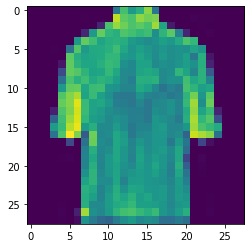

In [66]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (single_test_y==single_y_pred)
f_id = np.where(true_false==False)[0]        # 틀린 것들의 인덱스 반환
f_n = len(f_id)                              # 틀린 것들이 총 몇 개나 될까?

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()